In [36]:
# Import libaries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns

# Import Teradataml libraries
import teradataml
from teradataml import create_context, DataFrame,execute_sql, remove_context, TDDecisionForestPredict, DecisionForest

# Import machine learning packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score

# Importing the custom written class 
from decisiontree import Node 

In [3]:
local_df = pd.read_csv(r"C:\Users\knguy14\Desktop\Diabetes_project\Data\diabetes_dataset.csv")

In [3]:
print(local_df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


<Axes: >

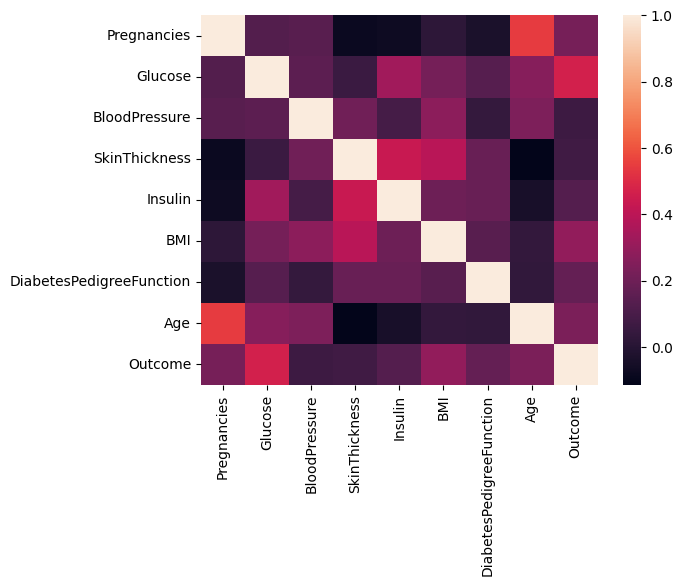

In [4]:
# Correlation matrix
local_df.corr()
sns.heatmap(local_df.corr())

In [7]:
local_df.info()
local_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
profile = ProfileReport(local_df, title="Pandas Profiling")
profile.to_file("diabetes_data.html")

c:\Users\knguy14\Desktop\Diabetes_project\.venv\Lib\site-packages\ydata_profiling\profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 271.76it/s]


# Exploratory Data Analysis


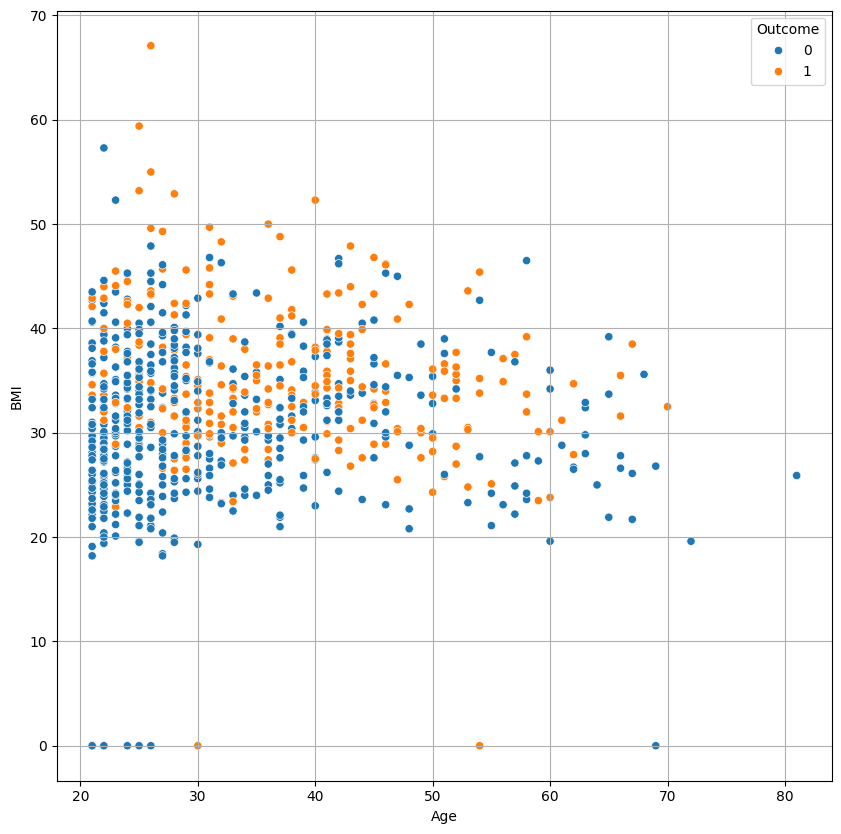

In [9]:
df1= local_df[['Age', 'BMI', 'Outcome']]
plt.figure(figsize=(10,10))
sns.scatterplot(y='BMI', x='Age', data=df1, hue='Outcome')
plt.grid()
plt.show()

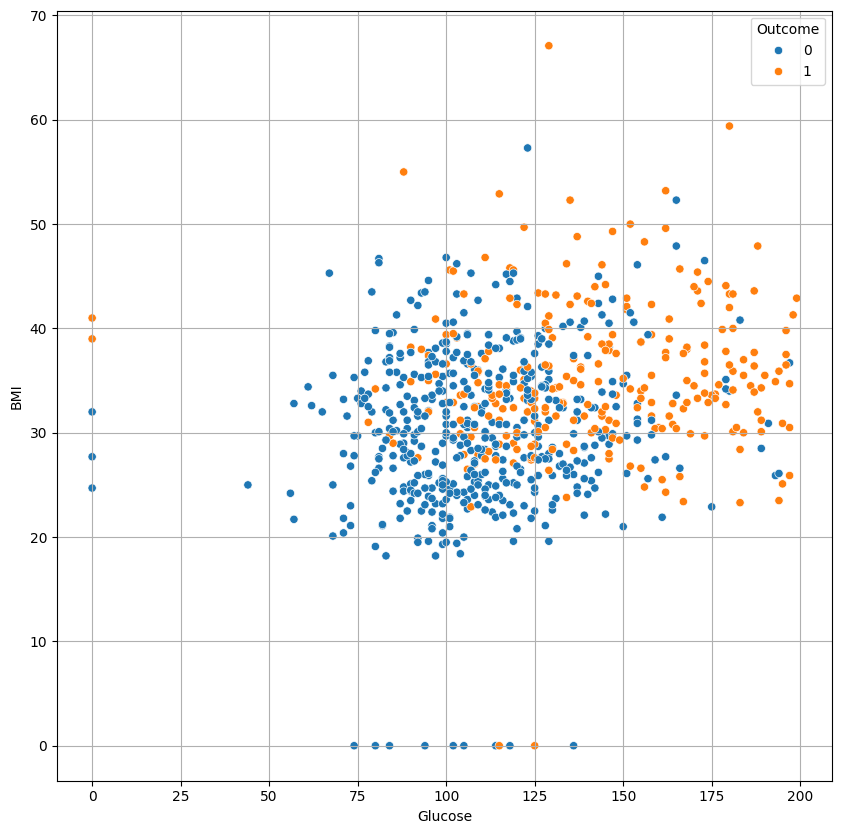

In [10]:
df1= local_df[['Glucose', 'BMI', 'Outcome']]
plt.figure(figsize=(10,10))
sns.scatterplot(y='BMI', x='Glucose', data=df1, hue='Outcome')
plt.grid()
plt.show()

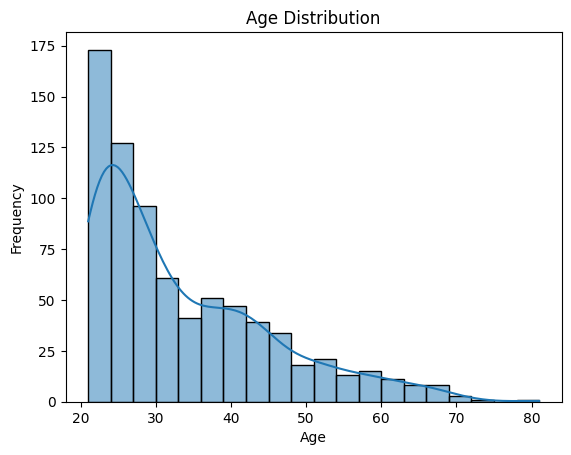

In [11]:
# Visualize the Age distribution
sns.histplot(local_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Fraction of rows in the training set 
train_share = 0.80

# Creating the train and test sets
train = local_df.sample(frac=train_share)
test = local_df[~local_df.index.isin(train.index)].copy()

print(f"Total rows in the dataset: {local_df.shape[0]}")
print(f"Rows in training set: {train.shape[0]}")
print(f"Rows in test set: {test.shape[0]}")

Total rows in the dataset: 768
Rows in training set: 614
Rows in test set: 154


In [6]:
# Prepare the data
X = train[['Pregnancies', 'Glucose', 'BloodPressure', 
               'SkinThickness', 'Insulin', 'BMI', 
               'DiabetesPedigreeFunction', 'Age']]
y = train['Outcome']

# Create and fit the model with a higher max_depth
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X, y)

# Get the split threshold
split_thres = tree.tree_.threshold[0]
print(f"Split threshold: {split_thres}")

Split threshold: 123.5


In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

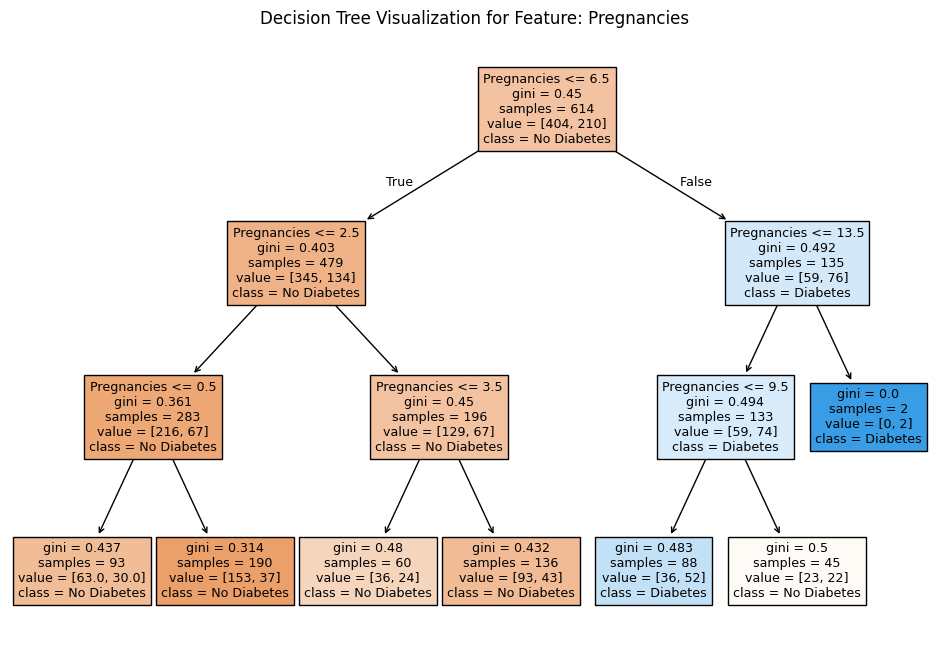

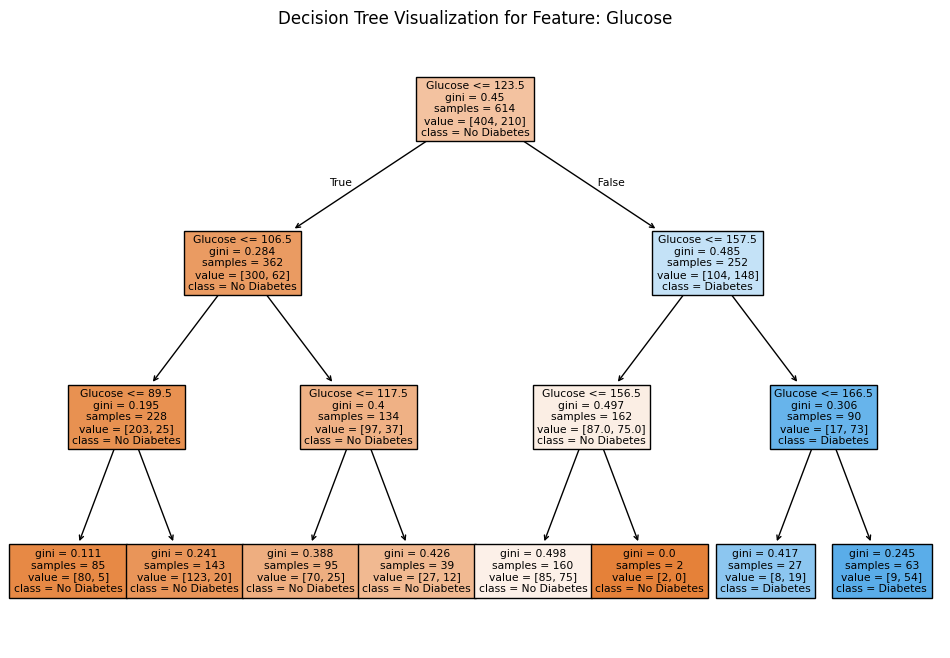

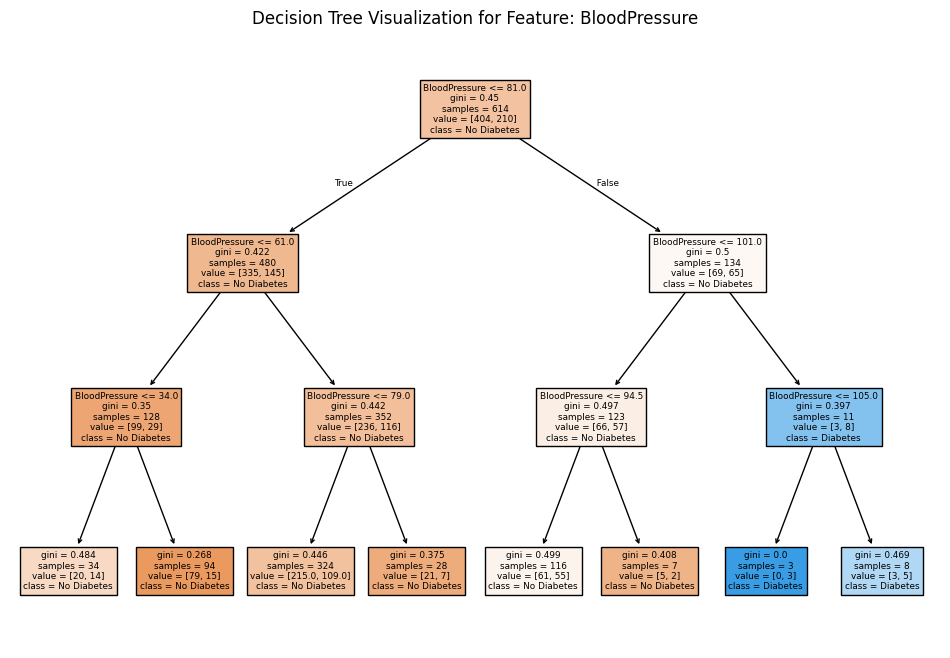

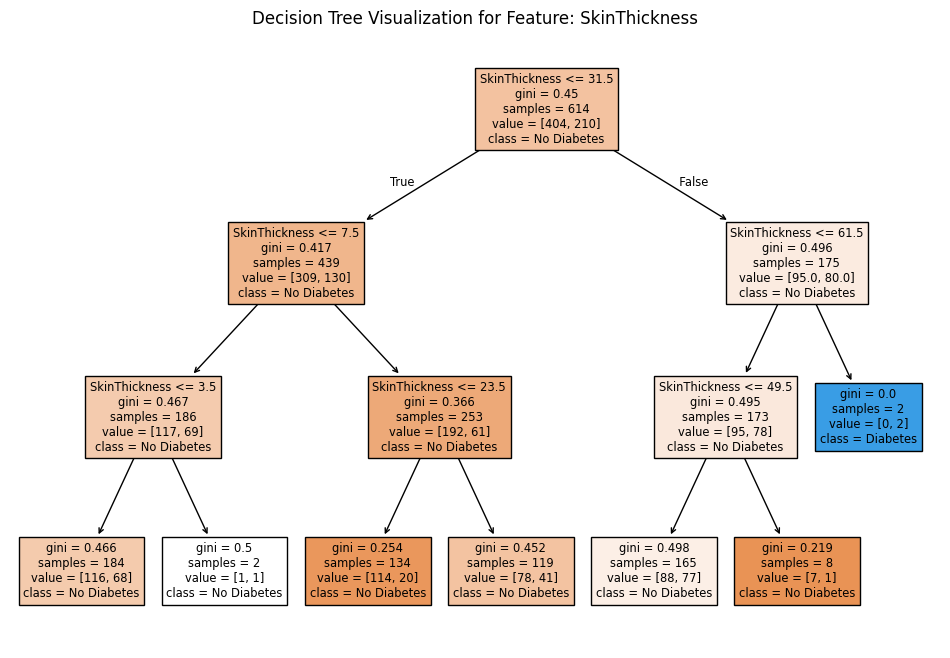

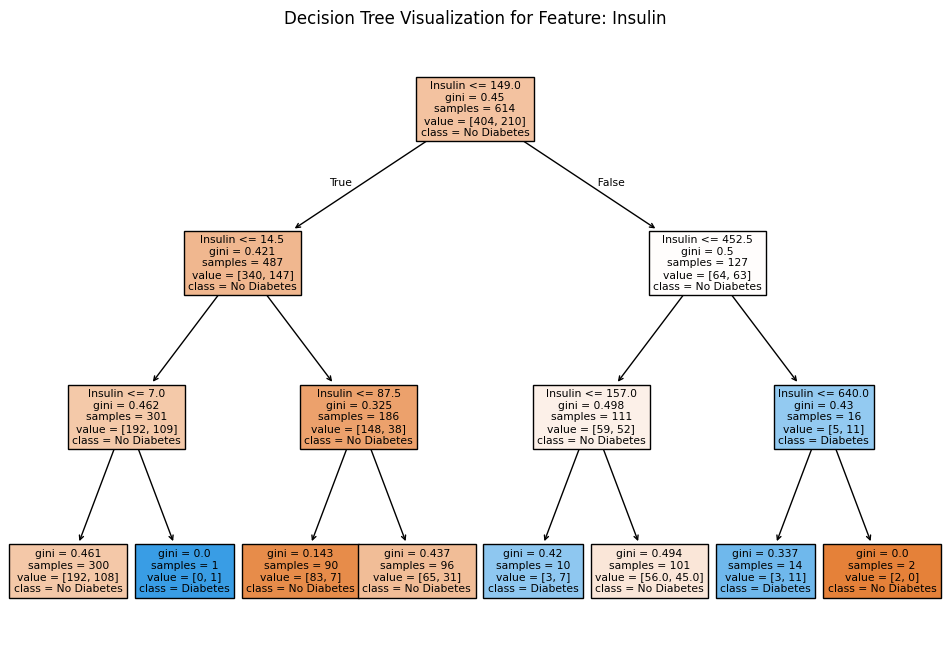

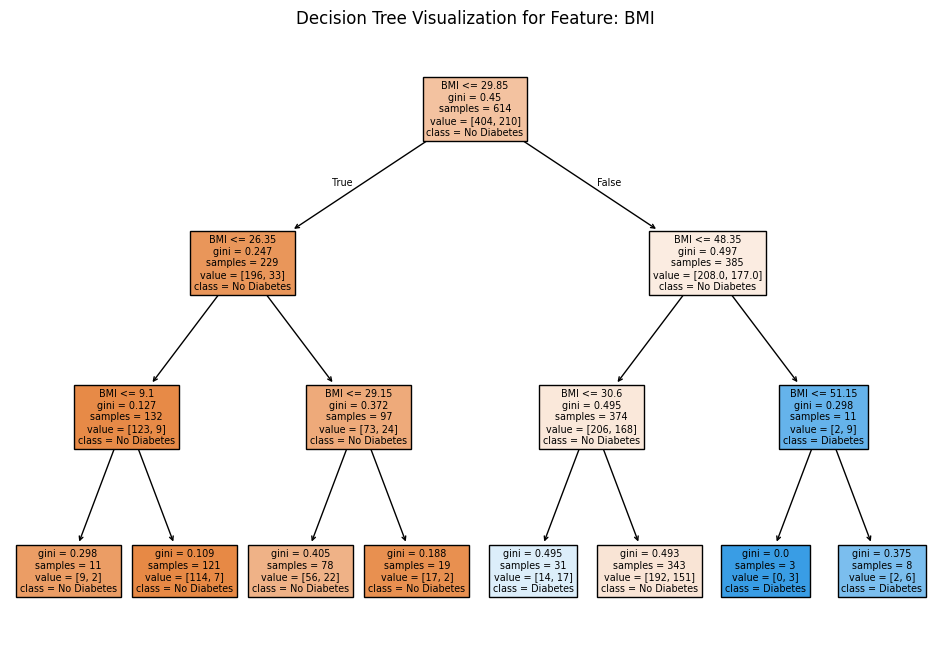

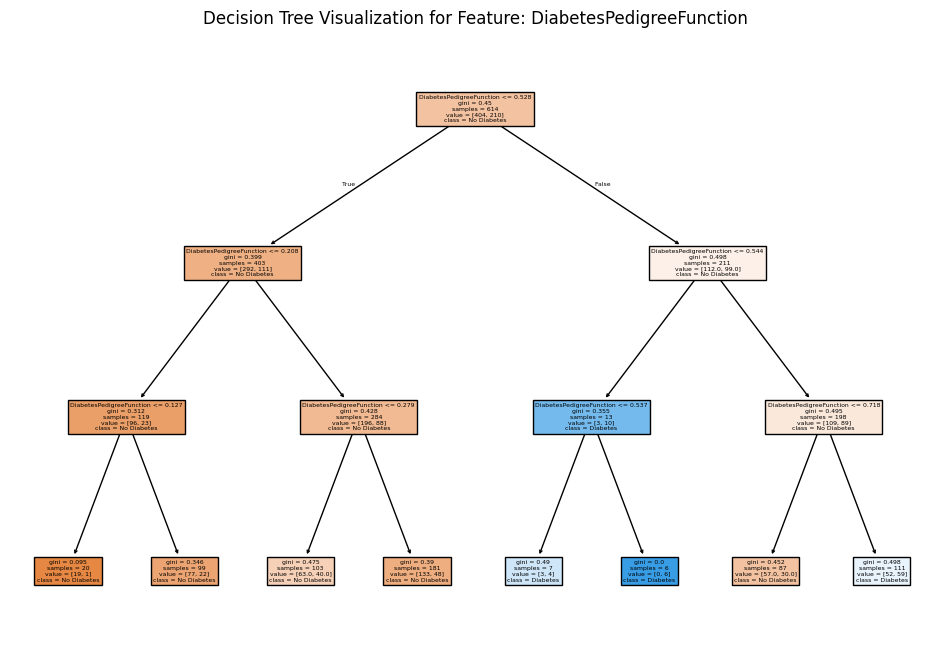

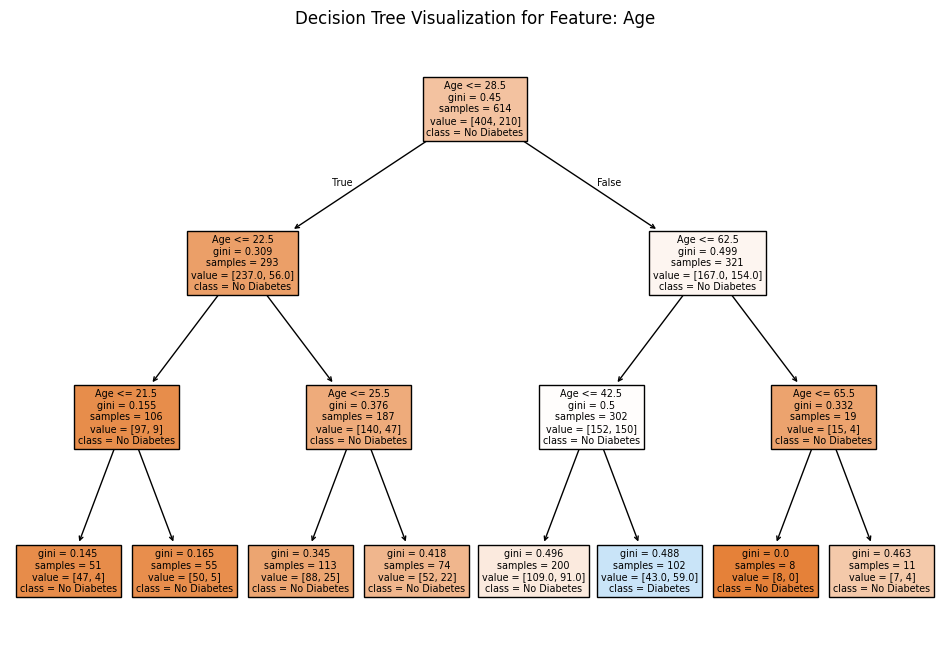

Features sorted by Gini impurity:
Feature 'Glucose': Gini Impurity = 0.3316778170649023
Feature 'BMI': Gini Impurity = 0.3893092870804775
Feature 'Age': Gini Impurity = 0.3914437088874687
Feature 'Insulin': Gini Impurity = 0.41033477783562433
Feature 'Pregnancies': Gini Impurity = 0.4118530976193622
Feature 'DiabetesPedigreeFunction': Gini Impurity = 0.4130519430890863
Feature 'SkinThickness': Gini Impurity = 0.42084725354079555
Feature 'BloodPressure': Gini Impurity = 0.42556322225285204

Best Feature: 'Glucose' with Gini Impurity = 0.3316778170649023


In [15]:

# Initialize a dictionary to hold Gini impurities for each feature
gini_impurities = {}

# Loop through each feature and visualize the decision tree for each split
for i in range(X.shape[1]):
    # Create and fit the classifier with only the current feature
    clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
    clf.fit(X.iloc[:, [i]], y)  # Use double brackets for DataFrame
    
    # Visualize the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(clf, feature_names=[X.columns[i]], class_names=['No Diabetes', 'Diabetes'], filled=True)
    plt.title(f"Decision Tree Visualization for Feature: {X.columns[i]}")
    plt.show()
    
    # Get predicted probabilities
    prob = clf.predict_proba(X.iloc[:, [i]])  # Use double brackets for DataFrame
    
    # Calculate Gini impurity
    gini_impurity = 1 - sum((prob[:, j]**2).sum() for j in range(prob.shape[1])) / len(prob)
    gini_impurities[X.columns[i]] = gini_impurity  # Use feature name as key

# Sort features by Gini impurity
sorted_features = sorted(gini_impurities.items(), key=lambda item: item[1])

# Print all features sorted by Gini impurity
print("Features sorted by Gini impurity:")
for feature, impurity in sorted_features:
    print(f"Feature '{feature}': Gini Impurity = {impurity}")

# Find the feature with the lowest Gini impurity
best_feature = sorted_features[0][0]
print(f"\nBest Feature: '{best_feature}' with Gini Impurity = {sorted_features[0][1]}")

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the decision tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[61 20]
 [16 26]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        81
           1       0.57      0.62      0.59        42

    accuracy                           0.71       123
   macro avg       0.68      0.69      0.68       123
weighted avg       0.71      0.71      0.71       123



In [38]:
# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

                    Feature  Importance
1                   Glucose    0.316611
5                       BMI    0.227350
2             BloodPressure    0.099312
6  DiabetesPedigreeFunction    0.098243
7                       Age    0.083177
0               Pregnancies    0.064435
4                   Insulin    0.058271
3             SkinThickness    0.052601


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [40]:
# Create the decision tree classifier with the best parameters
clf_best = DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, min_samples_split=2, random_state=0)

# Fit the model
clf_best.fit(X_train, y_train)

# Make predictions
y_pred = clf_best.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[74  7]
 [28 14]]
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        81
           1       0.67      0.33      0.44        42

    accuracy                           0.72       123
   macro avg       0.70      0.62      0.63       123
weighted avg       0.71      0.72      0.68       123



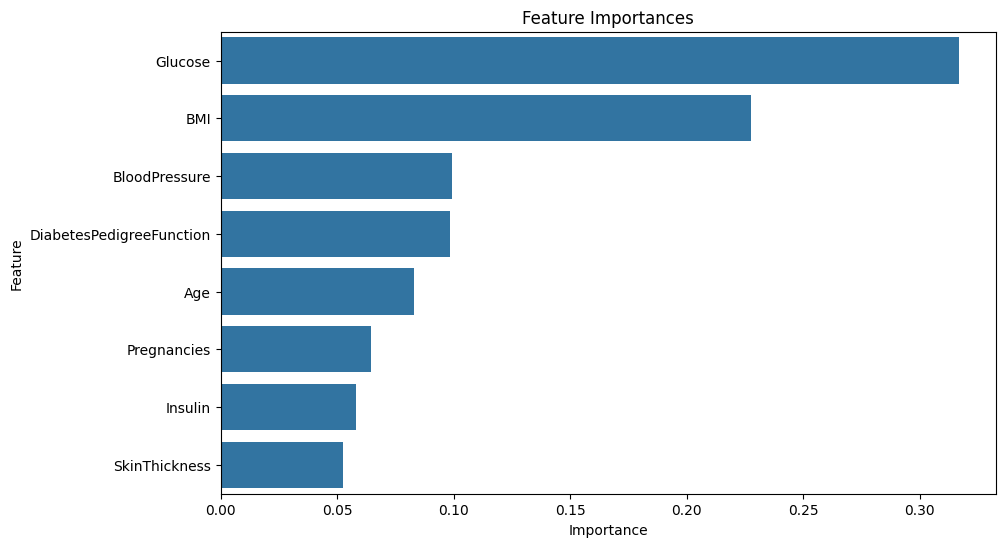

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


In [46]:
from sklearn.model_selection import cross_val_score

# Use cross-validation to evaluate the model
scores = cross_val_score(clf_best, X, y, cv=10)  # cv=10 means 10-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation scores: [0.70967742 0.75806452 0.74193548 0.66129032 0.83606557 0.83606557
 0.68852459 0.73770492 0.83606557 0.70491803]
Mean cross-validation score: 0.7510312004230567
